In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_diabetes
data = load_diabetes()

In [3]:
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [4]:
x = data.data
y = data.target

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test , y_train,y_test = train_test_split(x,y,test_size=0.2 ,random_state=45)

In [6]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [7]:
lr.fit(x_train,y_train)

LinearRegression()

In [8]:
print(lr.coef_)
print(lr.intercept_)

[  23.45465406 -247.42747406  492.1087518   329.35876431 -970.79723039
  573.54295519  182.42162368  255.92168168  794.21609282   89.32249214]
152.13623331746496


In [9]:
y_pred =lr.predict(x_test)

In [10]:
from sklearn.metrics import r2_score, mean_squared_error

print("r2 score", r2_score(y_test,y_pred))
print("RMSE", np.sqrt(mean_squared_error(y_test,y_pred)))

r2 score 0.5188113124539246
RMSE 48.727137609532534


In [11]:
from sklearn.linear_model import Ridge
r = Ridge(alpha = 100000)

In [12]:
r.fit(x_train,y_train)

Ridge(alpha=100000)

In [13]:
print(r.coef_)
print(r.intercept_)
y_pred1 = r.predict(x_test)
print("r2_score",r2_score(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

[ 0.00260126  0.00057066  0.00776597  0.0060976   0.00233864  0.00184724
 -0.00513942  0.0052716   0.00734598  0.00528629]
151.83287930791352
r2_score 0.5188113124539246
RMSE 48.727137609532534


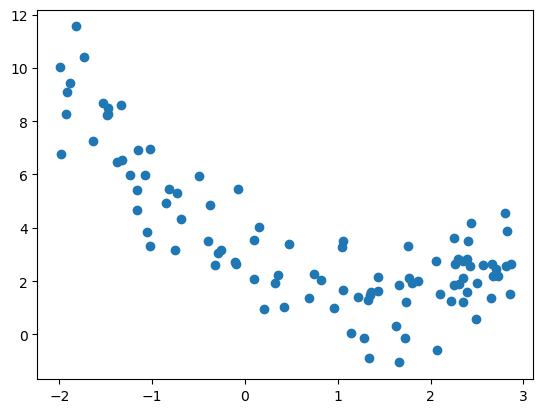

In [14]:
m = 100
x1 = 5 * np.random.rand(m, 1) - 2
x2 = 0.7 * x1 ** 2 - 2 * x1 + 3 + np.random.randn(m, 1)

plt.scatter(x1, x2)
plt.show()

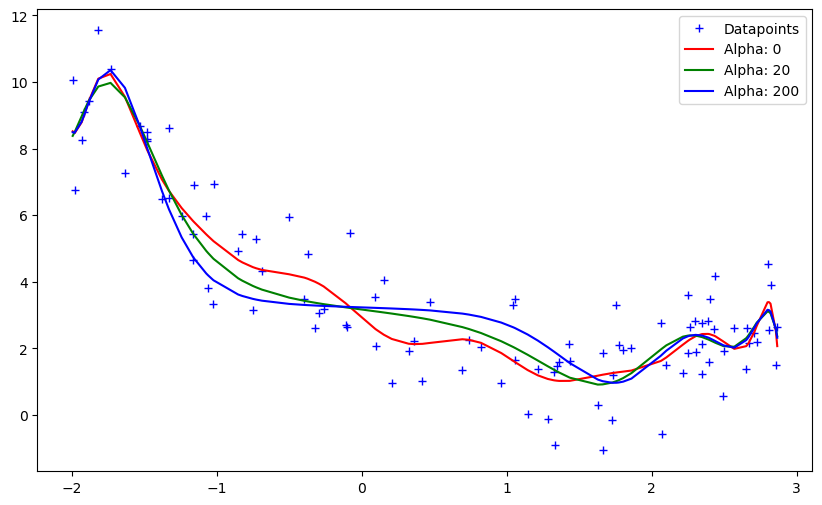

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def get_preds_ridge(x1,x2,alpha):
    model = Pipeline([
    ('poly_feats',PolynomialFeatures(degree=16)),
    ('ridge', Ridge(alpha = alpha))
    ])
    model.fit(x1,x2)
    return model.predict(x1)
alphas =[0,20,200]
cs = ['r','g','b']

plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_ridge(x1, x2, alpha)
    # Plot
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()


In [16]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np

In [17]:
x,y= make_regression(n_samples = 100 , n_features=1, n_informative=1 ,n_targets=1, noise=20 ,random_state=13)

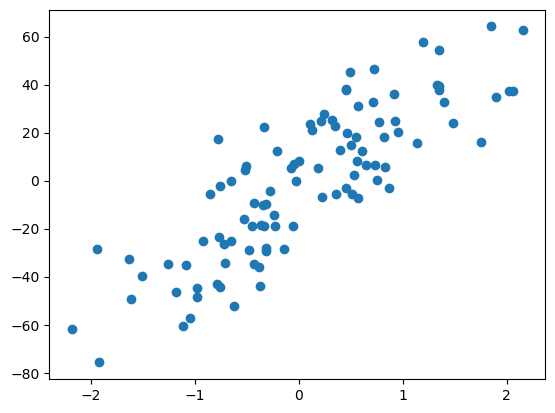

In [18]:
plt.scatter(x,y)

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
lr = LinearRegression()

In [21]:
lr.fit(x,y)
print(lr.coef_)
print(lr.intercept_)

[27.82809103]
-2.29474455867698


In [22]:
from sklearn.linear_model import Ridge

In [23]:
r= Ridge(alpha=10)

In [24]:
r.fit(x,y)
print(r.coef_)
print(r.intercept_)

[24.9546267]
-2.1269130035235726


In [25]:
rr= Ridge(alpha=100)
rr.fit(x,y)
print(rr.coef_)
print(rr.intercept_)

[12.93442104]
-1.4248441496033308


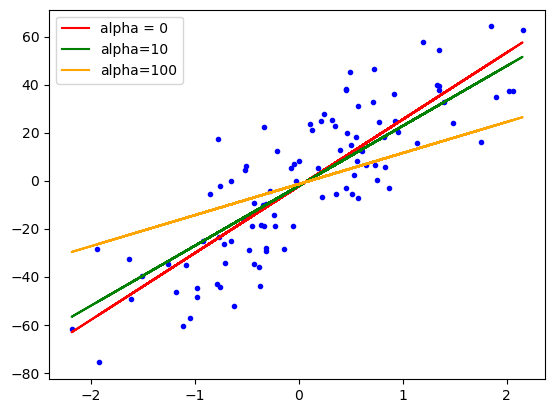

In [26]:
plt.plot(x,y,'b.')
plt.plot(x,lr.predict(x),color= 'red',label = 'alpha = 0')
plt.plot(x,r.predict(x), color = 'green', label = 'alpha=10')
plt.plot(x,rr.predict(x),color = 'orange',label = 'alpha=100')
plt.legend()

In [27]:
class MeraRidge:
    
    def __init__(self,alpha=0.1):
        self.alpha = alpha 
        self.m = None
        self.b = None
        
    def fit(self,x_train,y_train):
        num = 0 
        den = 0
            
        for i in range(x_train.shape[0]):
            num = num + (y_train[i] - y_train.mean())* (x_train[i]- x_train.mean())
            den = den + (x_train[i]- x_train.mean())**2
                
        self.m = num/(den + self.alpha)
        self.b = y_train.mean() - (self.m*x_train.mean())
        print(self.m , self.b)
            
    def predict(x_test):
        pass

In [28]:
reg= MeraRidge(alpha = 10)

In [29]:
reg.fit(x,y)

[24.9546267] [-2.126913]


# Ridge Regression
Multi columns 


In [48]:
from sklearn.datasets import load_diabetes
from sklearn.metrics import r2_score
import numpy as np

In [49]:
X,y = load_diabetes(return_X_y=True)

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2 , random_state=32)

In [52]:
from sklearn.linear_model import Ridge

In [53]:
# solver = auto ,svd,cholesky, isqr, sparse_cg, sag, saga
reg= Ridge(alpha=0.1 ,solver = 'cholesky')


In [54]:
reg.fit(X_train,y_train)

Ridge(alpha=0.1, solver='cholesky')

In [55]:
y_pred = reg.predict(X_test)
r2_score(y_test,y_pred)

0.45325889776269346

In [56]:
print(reg.coef_)
print(reg.intercept_)

[  37.93172069 -232.88887148  465.78070277  338.23126522  -77.75109019
  -69.16450635 -194.22090004  103.48718113  420.14109006  103.79410067]
154.0703280842028


In [59]:
class MeraRidge:
    
    def __init__(self,alpha=0.1):
        
        self.alpha = alpha
        self.coef_ = None
        self.intercept_ = None
        
    def fit(self,X_train,y_train):
        
        X_train = np.insert(X_train,0,1,axis=1)
        I = np.identity(X_train.shape[1])
        I[0][0] = 0
        result = np.linalg.inv(np.dot(X_train.T,X_train) + self.alpha * I).dot(X_train.T).dot(y_train)
        self.intercept_ = result[0]
        self.coef_ = result[1:]
    
    def predict(self,X_test):
        return np.dot(X_test,self.coef_) + self.intercept_
reg = MeraRidge()

In [60]:
reg = MeraRidge()
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
print(r2_score(y_test,y_pred))
print(reg.coef_)
print(reg.intercept_)

0.453258897762694
[  37.93172069 -232.88887148  465.78070277  338.23126522  -77.75109019
  -69.16450635 -194.22090004  103.48718113  420.14109006  103.79410067]
154.07032808420269


# ridge regression with gradient descent

In [1]:
from sklearn.datasets import load_diabetes
from sklearn.metrics import r2_score
import numpy as np

In [4]:
x,y = load_diabetes(return_X_y= True)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2 , random_state=4)

In [7]:
from sklearn.linear_model import SGDRegressor

In [9]:
# max_iter = epochs , penalty =add the square of the coefficients to the loss function 
reg = SGDRegressor(penalty='l2',max_iter= 500,eta0=0.1 ,learning_rate='constant',alpha=0.001)

In [10]:
reg.fit(x_train,y_train)

SGDRegressor(alpha=0.001, eta0=0.1, learning_rate='constant', max_iter=500)

In [11]:
y_pred = reg.predict(x_test)
print('R2 score',r2_score(y_test,y_pred))
print(reg.coef_)
print(reg.intercept_)

R2 score 0.44188558349197804
[  49.36486386 -152.2533077   369.70223762  268.02982823   -5.63241478
  -57.85149285 -168.1926123   135.94692775  330.60724483  103.47723417]
[145.89895746]


# Different way to do ridge

In [12]:
from sklearn.linear_model import Ridge
reg = Ridge(alpha = 0.001,max_iter = 500,solver = 'sparse_cg')

In [15]:
reg.fit(x_train,y_train)
y_pred = reg.predict(x_test)
print('R2 score',r2_score(y_test,y_pred))
print(reg.coef_)
print(reg.intercept_)

R2 score 0.4625010162027918
[  34.52192778 -290.84083871  482.40181675  368.06786931 -852.44872818
  501.59160694  180.11115474  270.76334443  759.73534802   37.49135796]
151.101985182554


In [28]:
# thetha = w ,alpha = lamda
class MeraRidgeGD:
    
    def __init__(self,epochs, learning_rate,alpha):
        
        self.learning_rate= learning_rate
        self.epochs = epochs
        self.alpha =alpha
        self.coef_ = None
        self.intercept_ = None
        
    def fit(self,x_train,y_train):
        
        self.coef_= np.ones(x_train.shape[1])
        self.intercept_ = 0
        thetha = np.insert(self.coef_,0,self.intercept_)
        
        x_train = np.insert(x_train,0,1,axis = 1)
        
        for i in range(self.epochs):
            thetha_der = np.dot(x_train.T, x_train).dot(thetha) -np.dot(x_train.T,y_train) + self.alpha*thetha
            thetha = thetha - self.learning_rate*thetha_der
            
            self.coef_ = thetha[1:]
        self.intercept_ = thetha[0]
    
    def predict(self,x_test):
        
        return np.dot(x_test,self.coef_) + self.intercept_
        

In [29]:
# to know 
coef= np.ones(x_train.shape[1])
intercept_ = 0
thetha = np.insert(coef,0,intercept_)
thetha

array([0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [30]:
# to know
coef= np.ones(x_train.shape[1])
coef

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [31]:
reg = MeraRidgeGD(epochs=500,alpha=0.001,learning_rate=0.005)

In [32]:
reg.fit(x_train,y_train)

y_pred = reg.predict(x_test)
print("R2 score",r2_score(y_test,y_pred))
print(reg.coef_)
print(reg.intercept_)

R2 score 0.4738018280260914
[  46.65050914 -221.3750037   452.12080647  325.54248128  -29.09464178
  -96.47517735 -190.90017011  146.32900372  400.80267299   95.09048094]
150.8697531671347
